In [2]:
#1. Installing libraries
# pip install matplotlib
# pip install pylatexenc
# pip install "qiskit[visualization]" 
# pip install qiskit-ibm-runtime
# pip install qiskit-aer

#2. Importing libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

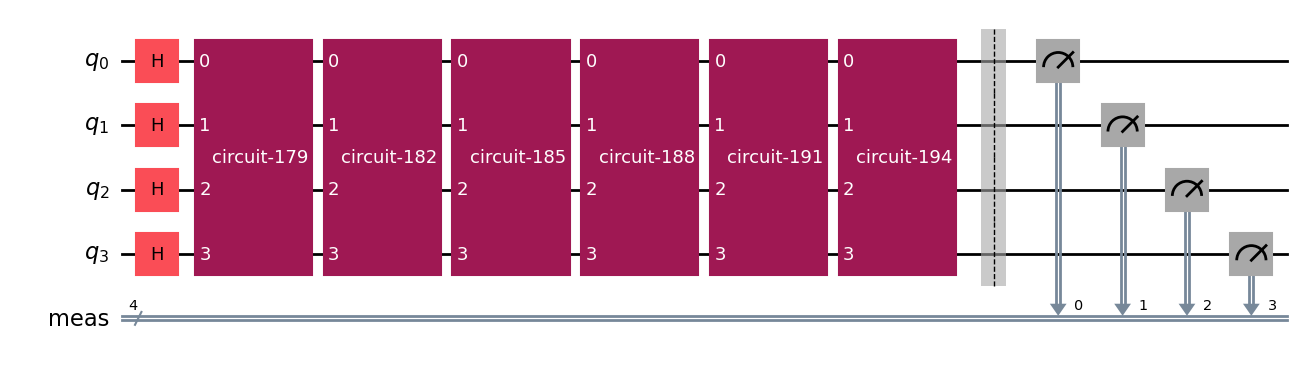

In [ ]:
#3 (Grover). Creating a quantum circuit & drawing
from qiskit.circuit.library import ZGate, MCMTGate

def Marking():
    circ = QuantumCircuit(4)
    circ.x(0)
    circ.x(3)
    ccc_z = MCMTGate(ZGate(), num_ctrl_qubits=3, num_target_qubits=1)
    circ.append(ccc_z, [0, 1, 2, 3]) # controls: q0,q1,q2 ; target: q3
    circ.x(0)
    circ.x(3)
    return circ.to_gate()   

def Amplification():
    circ = QuantumCircuit(4)
    circ.h(0); circ.h(1); circ.h(2); circ.h(3)
    circ.x(0); circ.x(1); circ.x(2); circ.x(3)
    ccc_z = MCMTGate(ZGate(), num_ctrl_qubits=3, num_target_qubits=1)
    circ.append(ccc_z, [0, 1, 2, 3]) # controls: q0,q1,q2 ; target: q3
    circ.x(0); circ.x(1); circ.x(2); circ.x(3)
    circ.h(0); circ.h(1); circ.h(2); circ.h(3)
    return circ.to_gate()

qc = QuantumCircuit(4)
qc.h(0); qc.h(1); qc.h(2); qc.h(3)

qc.append(Marking(), [0, 1, 2, 3])
qc.append(Amplification(), [0, 1, 2, 3])
qc.append(Marking(), [0, 1, 2, 3])
qc.append(Amplification(), [0, 1, 2, 3])
qc.append(Marking(), [0, 1, 2, 3])
qc.append(Amplification(), [0, 1, 2, 3])

qc.measure_all()

In [11]:
#4. Initializing backend
service = QiskitRuntimeService(token="tUc_7-OLcyx2JxBRwzDDj21diRzunKnB6uAYhPybzrrM",
                               instance = "crn:v1:bluemix:public:quantum-computing:us-east:a/3016096896794502bc35d62cc337dc74:af8a3019-f1f3-4ba5-8365-a86a8d27bcc5::",
                               channel="ibm_cloud")
# service.backend() allegedly should show all available backends, gives an error
# https://quantum.cloud.ibm.com/docs/en/guides/qpu-information#view-your-resources
# service.backend()  
backend = service.backend("ibm_brisbane")
print(backend)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
circuit = pm.run(qc)
# circuit.draw(output="mpl")

<IBMBackend('ibm_brisbane')>


In [12]:
#5. Executing the quantum circuit
sampler = Sampler(mode=backend)  # make sampler, IBM machine for backend 

sampler.options.twirling.enable_gates = True
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XpXm"

pub = (circuit,)  # (,) are there bc IBM says so 
job = sampler.run([pub], shots=int(1e4))  # [pub] has [] because IBM says so 
# 1e4 = 1 x 10^4 = 10,000

In [16]:
#5(b) run as many times as needed
print(job.status())

DONE


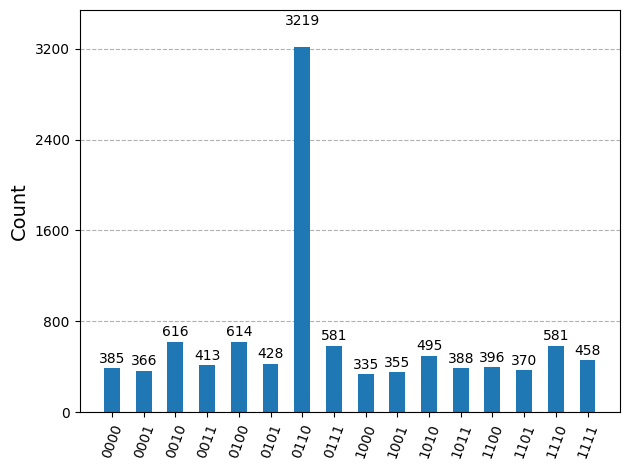

In [17]:
#6. Plotting results
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
plot_histogram(counts_bin)